In [1]:
#from IPython.core.interactiveshell import InteractiveShell
#InteractiveShell.ast_node_interactivity = "all"

import ipywidgets as widgets
from IPython import display

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
import sys
sys.path.append('/h/ashlie/jupyter_helpers')
import plot_helper as ph

import os

In [4]:
# time ms in msec, latency us in nsec.
base_path = '/h/ashlie/fio_fsync_all/write'
base_path2 = '/h/ashlie/fio_lat_test/write'
queue_sizes = [
    'q1',
    'q2',
    'q4',
    'q8',
]
latf = 'bs512/_lat.1.log'

spdk_dev = 'spdk'
sync_dev = 'sync_nvme'

files = {
    
}

for qs in queue_sizes:
    files[spdk_dev + ',' + qs[1:]] = os.path.join(os.path.join(os.path.join(base_path, qs), spdk_dev), latf)
    files[sync_dev + ',' + qs[1:]] = os.path.join(os.path.join(os.path.join(base_path2, qs), sync_dev), latf)

# Total time in sec
total_time = 10
bytes_per_mb = 1024 ** 2

large_fig_dim = (15, 10.6)

In [5]:
data = {}

In [6]:
for k, v in files.iteritems():
    df = ph.read_files([v])[0]
    df = df[df['time ms'] <= 10000]
    if k not in data:
        data[k] = {}

    data[k]['average latency (us)'] = df['latency us'].mean()
    data[k]['average bandwidth (MB/s)'] = float(df['bs'].sum()) / bytes_per_mb / total_time

In [7]:
datadict = {
    'queue depth': [],
    'average latency (us)': [],
    'average bandwidth (MB/s)': [],
    'device': []
}

for outer, outervals in data.iteritems():
    dev, qs = outer.split(',', 2)
    qs = int(qs)
    for k, v in outervals.iteritems():
        datadict[k].append(v)
    datadict['device'].append(dev)
    datadict['queue depth'].append(qs)

alldata = pd.DataFrame(datadict)

In [8]:
#alldata['normalized latency'] = alldata['average latency (us)'] / alldata['average latency (us)'][0]

In [9]:
alldata['bs'] = 512

In [10]:
#alldata

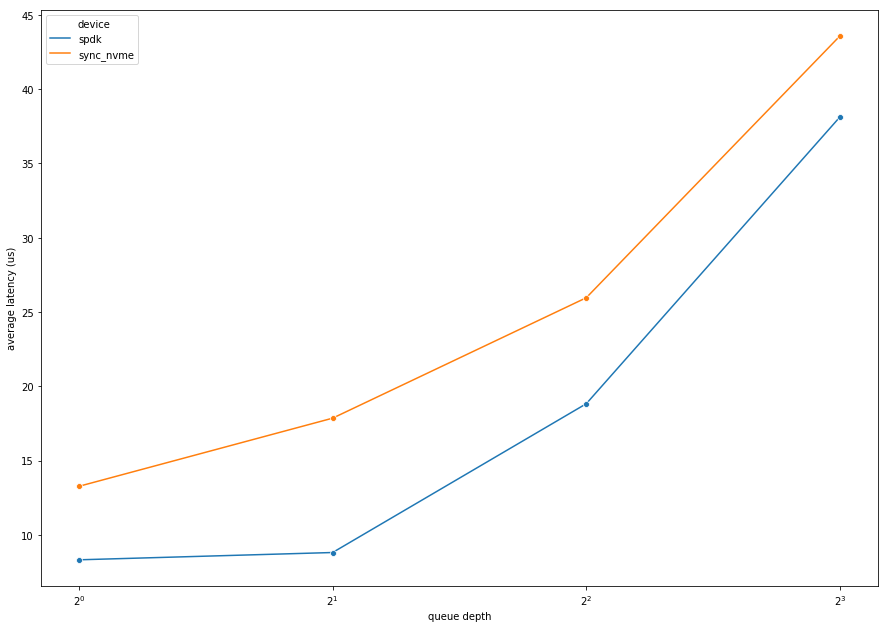

In [8]:
#fig, ax = plt.subplots()
fig, ax = plt.subplots(figsize=large_fig_dim)
sns.lineplot(x='queue depth', y='average latency (us)', data=alldata, hue='device', marker='o')
ax.set_xscale('log', basex=2)

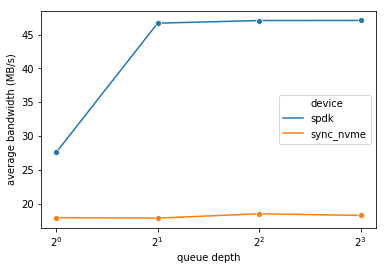

In [9]:
fig, ax = plt.subplots()
sns.lineplot(x='queue depth', y='average bandwidth (MB/s)', data=alldata, hue='device', marker='o')
ax.set_xscale('log', basex=2)

In [42]:
files4k = {}
latf4k = 'bs4096/_lat.1.log'
for dev in devs:
    for qs in queue_sizes:
        files4k[dev + ',' + qs[1:]] = os.path.join(os.path.join(os.path.join(base_path, qs), dev), latf4k)

In [43]:
data4k = {}

In [44]:
for k, v in files4k.iteritems():
    df = ph.read_files([v])[0]
    if k not in data4k:
        data4k[k] = {}

    data4k[k]['average latency (us)'] = df['latency us'].mean()
    data4k[k]['average bandwidth (MB/s)'] = float(df['bs'].sum()) / bytes_per_mb / total_time

In [45]:
datadict4k = {
    'queue depth': [],
    'average latency (us)': [],
    'average bandwidth (MB/s)': [],
    'device': []
}

for outer, outervals in data4k.iteritems():
    dev, qs = outer.split(',', 2)
    qs = int(qs)
    for k, v in outervals.iteritems():
        datadict4k[k].append(v)
    datadict4k['device'].append(dev)
    datadict4k['queue depth'].append(qs)

alldata4k = pd.DataFrame(datadict4k)

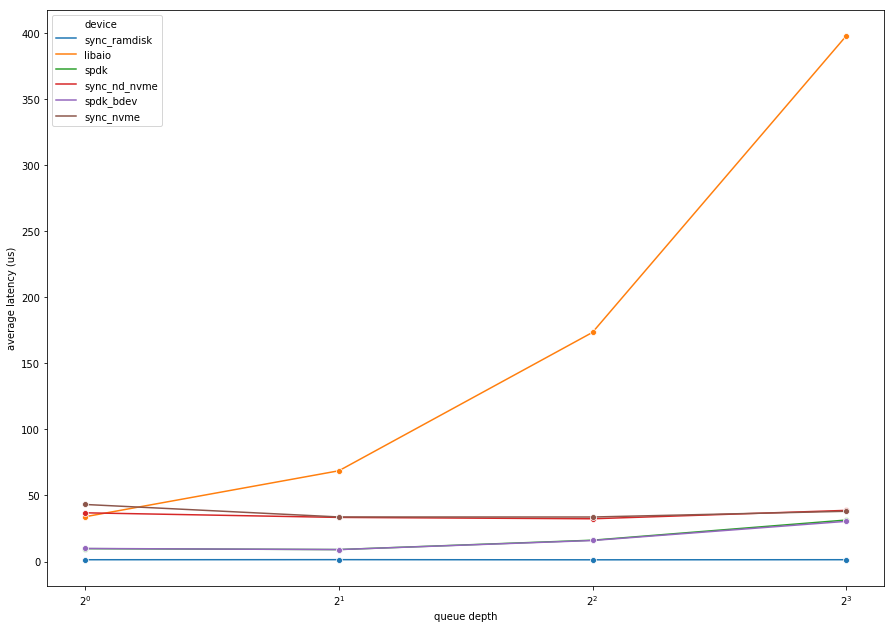

In [62]:
fig, ax = plt.subplots(figsize=large_fig_dim)
sns.lineplot(x='queue depth', y='average latency (us)', data=alldata4k, hue='device', marker='o')
ax.set_xscale('log', basex=2)

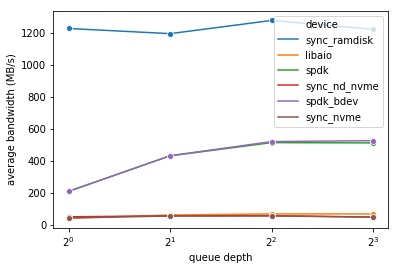

In [47]:
fig, ax = plt.subplots()
sns.lineplot(x='queue depth', y='average bandwidth (MB/s)', data=alldata4k, hue='device', marker='o')
ax.set_xticks([2 ** x for x in range(0, 8)])
ax.set_xscale('log', basex=2)

In [48]:
files8k = {}
latf8k = 'bs8192/_lat.1.log'
for dev in devs:
    for qs in queue_sizes:
        files8k[dev + ',' + qs[1:]] = os.path.join(os.path.join(os.path.join(base_path, qs), dev), latf8k)

In [49]:
data8k = {}

In [50]:
for k, v in files8k.iteritems():
    df = ph.read_files([v])[0]
    if k not in data8k:
        data8k[k] = {}

    data8k[k]['average latency (us)'] = df['latency us'].mean()
    data8k[k]['average bandwidth (MB/s)'] = float(df['bs'].sum()) / bytes_per_mb / total_time

In [51]:
datadict8k = {
    'queue depth': [],
    'average latency (us)': [],
    'average bandwidth (MB/s)': [],
    'device': []
}

for outer, outervals in data8k.iteritems():
    dev, qs = outer.split(',', 2)
    qs = int(qs)
    for k, v in outervals.iteritems():
        datadict8k[k].append(v)
    datadict8k['device'].append(dev)
    datadict8k['queue depth'].append(qs)

alldata8k = pd.DataFrame(datadict8k)

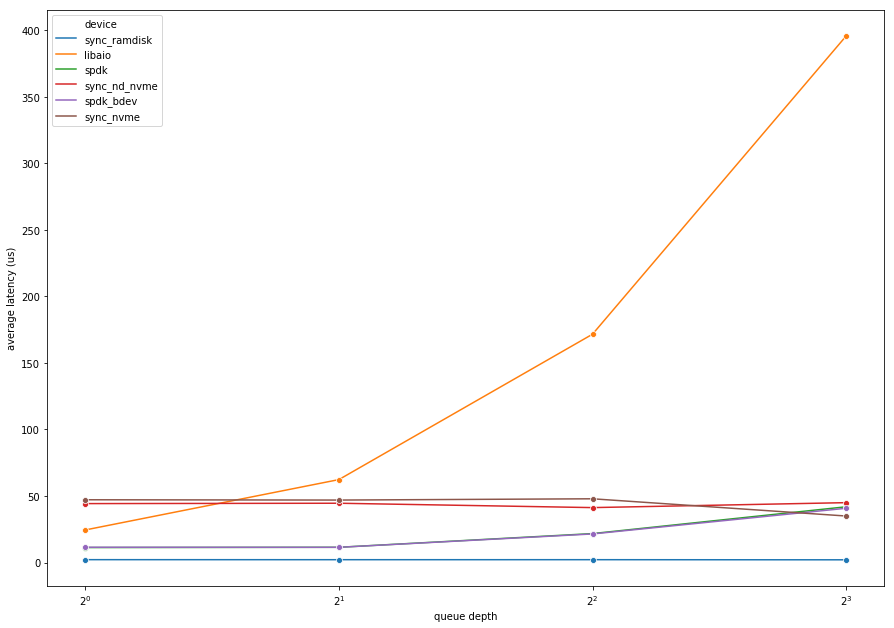

In [63]:
fig, ax = plt.subplots(figsize=large_fig_dim)
sns.lineplot(x='queue depth', y='average latency (us)', data=alldata8k, hue='device', marker='o')
ax.set_xscale('log', basex=2)

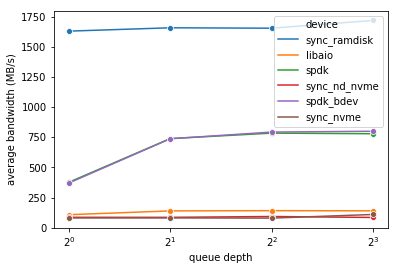

In [53]:
fig, ax = plt.subplots()
sns.lineplot(x='queue depth', y='average bandwidth (MB/s)', data=alldata8k, hue='device', marker='o')
ax.set_xticks([2 ** x for x in range(0, 8)])
ax.set_xscale('log', basex=2)

In [54]:
alldata['bs'] = 512
alldata4k['bs'] = 4096
alldata8k['bs'] = 8192

In [55]:
# Dump to files so we can not be so sad.
alldata.to_csv(os.path.join(base_path, 'agg512.csv'), index=False, sep=',')
alldata4k.to_csv(os.path.join(base_path, 'agg4096.csv'), index=False, sep=',')
alldata8k.to_csv(os.path.join(base_path, 'agg8192.csv'), index=False, sep=',')

In [6]:
# Load all the data from dumped files.
alldata = pd.read_csv(os.path.join(base_path, 'agg512.csv'), sep=',')
alldata4k = pd.read_csv(os.path.join(base_path, 'agg4096.csv'), sep=',')
alldata8k = pd.read_csv(os.path.join(base_path, 'agg8192.csv'), sep=',')

In [56]:
combined = pd.DataFrame()
combined = combined.append(alldata)
combined = combined.append(alldata4k)
combined = combined.append(alldata8k)
combined = combined.reset_index()
#combined['h'] = combined.apply(combineDevAndBs, axis=1)

In [57]:
#combined

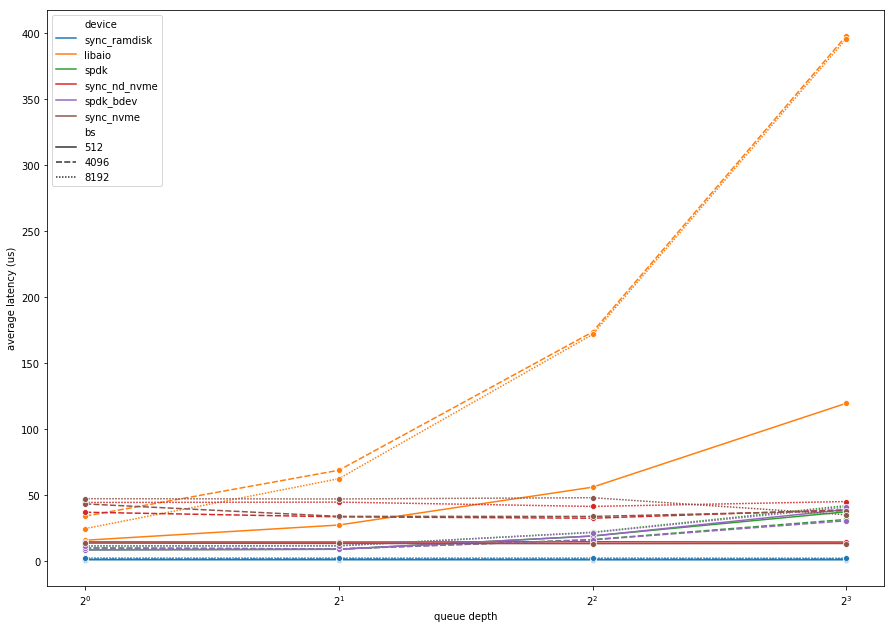

In [58]:
fig, ax = plt.subplots(figsize=large_fig_dim)
sns.lineplot(x='queue depth', y='average latency (us)', data=combined, marker='o', hue='device', style='bs')
ax.set_xscale('log', basex=2)

In [59]:
combined_short = combined[combined['queue depth'] < 8]

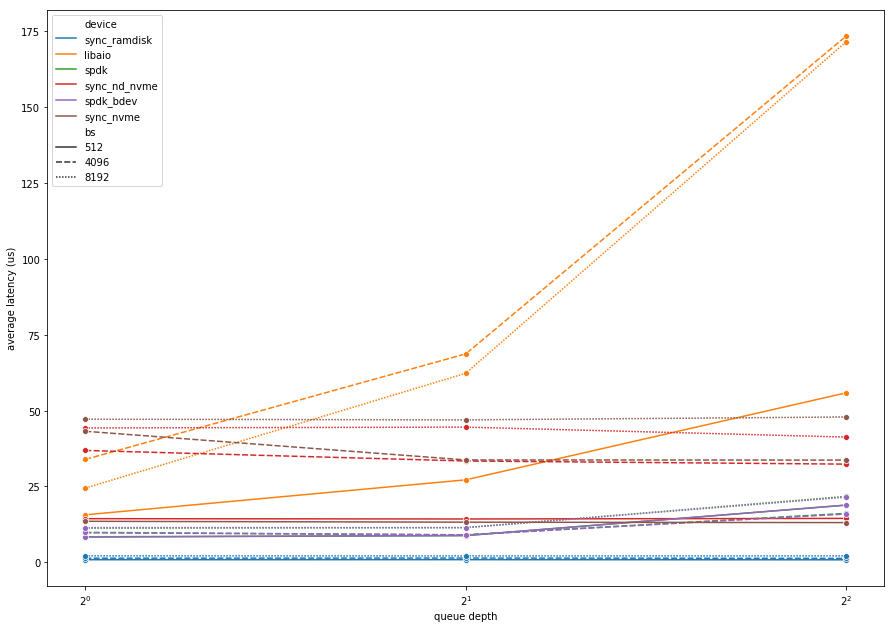

In [60]:
fig, ax = plt.subplots(figsize=large_fig_dim)
sns.lineplot(x='queue depth', y='average latency (us)', data=combined_short, marker='o', hue='device', style='bs')
ax.set_xscale('log', basex=2)

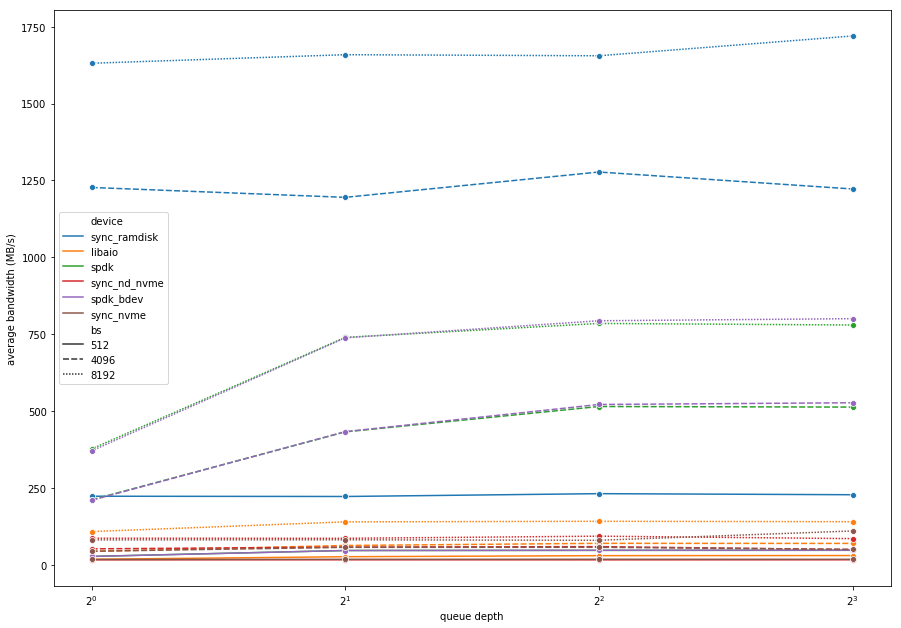

In [61]:
fig, ax = plt.subplots(figsize=large_fig_dim)
sns.lineplot(x='queue depth', y='average bandwidth (MB/s)', data=combined, marker='o', hue='device', style='bs')
ax.set_xscale('log', basex=2)

In [44]:
df512 = ph.read_files([os.path.join(os.path.join(os.path.join(base_path, 'q1'), 'sync_nd_nvme'), 'bs512/_lat.1.log')])[0]

In [45]:
df512.describe()

,time ms,latency us,bs
count,3.214761e+06,3.214761e+06,3214761.0
mean,6.072586e+04,1.927173e+01,512.0
std,3.421364e+04,1.181966e+02,0.0
min,1.434000e+03,1.502000e+00,512.0
25%,3.107200e+04,1.652000e+00,512.0
50%,6.075900e+04,1.709000e+00,512.0
75%,9.034000e+04,1.851000e+00,512.0
max,1.200000e+05,2.517397e+03,512.0


In [64]:
dff512 = ph.read_files([os.path.join(os.path.join(os.path.join(base_path, 'q1'), 'sync_nvme'), 'bs512/_lat.1.log')])[0]

In [65]:
dff512.describe()

,time ms,latency us,bs
count,8.653879e+06,8.653879e+06,8.653879e+06
mean,5.981866e+04,1.351409e+01,2.560000e+02
std,3.466388e+04,2.561933e+01,2.560000e+02
min,0.000000e+00,8.100000e-01,0.000000e+00
25%,2.975500e+04,8.960000e-01,0.000000e+00
50%,5.976700e+04,1.324200e+01,5.120000e+02
75%,8.981700e+04,1.457700e+01,5.120000e+02
max,1.200000e+05,3.456164e+03,5.120000e+02


In [51]:
df8192 = ph.read_files([os.path.join(os.path.join(os.path.join(base_path, 'q1'), 'sync_nd_nvme'), 'bs8192/_lat.1.log')])[0]

In [52]:
df8192.describe()

,time ms,latency us,bs
count,1.710515e+06,1.710515e+06,1710515.0
mean,6.019147e+04,5.960604e+00,8192.0
std,3.432968e+04,1.204115e+00,0.0
min,0.000000e+00,4.585000e+00,8192.0
25%,3.057700e+04,5.143000e+00,8192.0
50%,5.994700e+04,5.934000e+00,8192.0
75%,8.988500e+04,6.500000e+00,8192.0
max,1.199990e+05,4.408320e+02,8192.0


In [53]:
dff8192 = ph.read_files([os.path.join(os.path.join(os.path.join(base_path, 'q1'), 'sync_nvme'), 'bs8192/_lat.1.log')])[0]

In [54]:
dff8192.describe()

,time ms,latency us,bs
count,1.236453e+06,1.236453e+06,1236453.0
mean,6.004049e+04,3.786131e+01,8192.0
std,3.465996e+04,1.244500e+01,0.0
min,0.000000e+00,2.211100e+01,8192.0
25%,3.012800e+04,2.584500e+01,8192.0
50%,6.008800e+04,3.704500e+01,8192.0
75%,9.007100e+04,4.892800e+01,8192.0
max,1.200000e+05,1.058136e+03,8192.0


In [13]:
# time ms in msec, latency us in nsec.
base_path2 = '/h/ashlie/fio_lat_test/write'
queue_sizes = [
    'q16',
    'q32',
    'q64',
    'q128',
]
latf = 'bs512/_lat.1.log'

sync_dev = 'sync_nvme'

files_all = {
    
}

for qs in queue_sizes:
    files_all[sync_dev + ',' + qs[1:]] = os.path.join(os.path.join(os.path.join(base_path2, qs), sync_dev), latf)

In [16]:
data_all = {}

In [17]:
for k, v in files_all.iteritems():
    df = ph.read_files([v])[0]
    df = df[df['time ms'] <= 10000]
    if k not in data_all:
        data_all[k] = {}

    data_all[k]['average latency (us)'] = df['latency us'].mean()
    data_all[k]['average bandwidth (MB/s)'] = float(df['bs'].sum()) / bytes_per_mb / total_time

In [18]:
datadict_all = {
    'queue depth': [],
    'average latency (us)': [],
    'average bandwidth (MB/s)': [],
    'device': []
}

for outer, outervals in data_all.iteritems():
    dev, qs = outer.split(',', 2)
    qs = int(qs)
    for k, v in outervals.iteritems():
        datadict_all[k].append(v)
    datadict_all['device'].append(dev)
    datadict_all['queue depth'].append(qs)

alldata_all = alldata[alldata['device'] == 'sync_nvme']
alldata_all = alldata_all.append(pd.DataFrame(datadict_all))

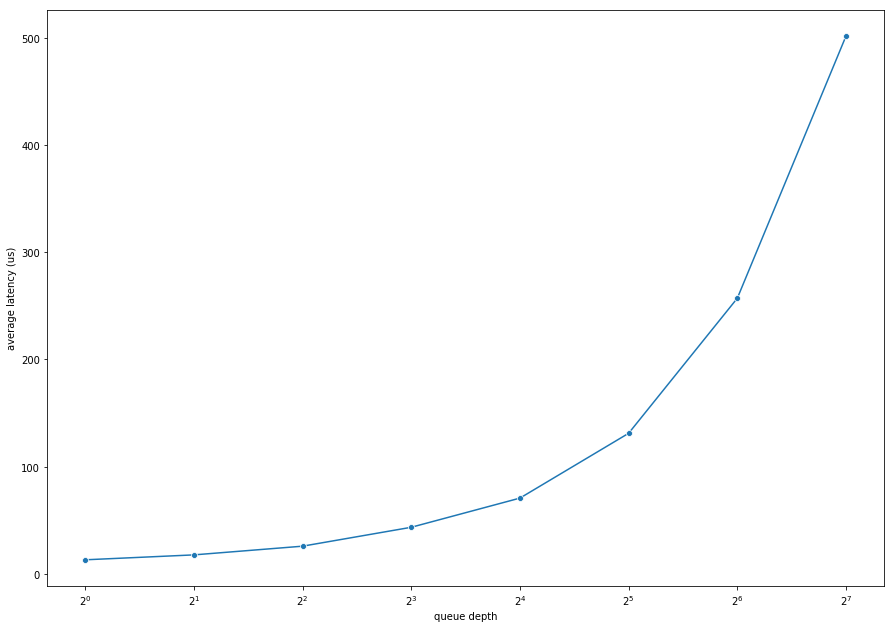

In [19]:
fig, ax = plt.subplots(figsize=large_fig_dim)
sns.lineplot(x='queue depth', y='average latency (us)', data=alldata_all, marker='o')
ax.set_xscale('log', basex=2)